In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import operator
import time
%matplotlib inline

In [2]:
# The following lines you can ignore. It was needed to properly use the current version of Tensorflow on my Macbook 
# due to issues with OpenMP. Leaving here in case it's useful for others.
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
dfRed = pd.read_csv('winequality-red.csv', sep=';', header=0)
dfWhite = pd.read_csv('winequality-white.csv', sep=';', header=0)

In [4]:
dfWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dfRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dfRed.index

RangeIndex(start=0, stop=1599, step=1)

In [7]:
dfWhite.index

RangeIndex(start=0, stop=4898, step=1)

In [8]:
#Get all the variable names
var = dfWhite.columns.tolist()
var.pop()

'quality'

In [9]:
x = dfWhite[var].values
y = dfWhite['quality'].values

In [10]:
len(x)

4898

In [11]:
Xtr = x[:4000]
Xts = x[4000:]
ytr = y[:4000]
yts = y[4000:]

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

In [13]:
import tensorflow.keras.backend as K
K.clear_session()

In [14]:
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               1200      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))

Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 81us/sample - loss: 1.7186 - accuracy: 0.4272 - val_loss: 1.2471 - val_accuracy: 0.5356
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 1.3339 - accuracy: 0.4272 - val_loss: 1.1898 - val_accuracy: 0.5312
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 1.3004 - accuracy: 0.4322 - val_loss: 1.1760 - val_accuracy: 0.5122
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 1.2830 - accuracy: 0.4305 - val_loss: 1.1240 - val_accuracy: 0.5356
Epoch 5/50
4000/4000 [==============================] - 0s 11us/sample - loss: 1.2633 - accuracy: 0.4333 - val_loss: 1.1425 - val_accuracy: 0.5367
Epoch 6/50
4000/4000 [==============================] - 0s 13us/sample - loss: 1.2516 - accuracy: 0.4372 - val_loss: 1.1369 - val_accuracy: 0.5189
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

Text(0.5,1,'Neural Network Baseline Performance')

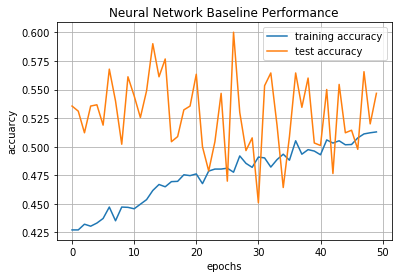

In [18]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])
plt.title('Neural Network Baseline Performance')

In [19]:
model.save("wineTr.h5")

In [20]:
from tensorflow.keras.models import load_model

model = load_model("wineTr.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               1200      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


In [21]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 87us/sample - loss: 1.0428 - accuracy: 0.5468
accuracy = 0.546771


In [22]:
#Data cleaning 


fixed_acidity = dfWhite['fixed acidity'].values
fixed_acidity_max = np.max(fixed_acidity)
fixed_acidity = 2*(fixed_acidity/fixed_acidity_max - 0.5)

volatile_acidity = dfWhite['volatile acidity'].values
volatile_acidity_max = np.max(volatile_acidity)
volatile_acidity = 2*(volatile_acidity/volatile_acidity_max - 0.5)

x = np.stack((fixed_acidity, volatile_acidity), axis=-1)


for i in range(2,len(var)):
    current_column = dfWhite[var[i]].values
    current_column_max = np.max(current_column)
    current_column = 2*(current_column/current_column_max - 0.5)
    x = np.hstack((x, np.atleast_2d(current_column).T)) 
x

array([[-0.01408451, -0.50909091, -0.56626506, ...,  0.57068063,
        -0.16666667,  0.23943662],
       [-0.11267606, -0.45454545, -0.59036145, ...,  0.72774869,
        -0.09259259,  0.33802817],
       [ 0.14084507, -0.49090909, -0.51807229, ...,  0.70680628,
        -0.18518519,  0.42253521],
       ...,
       [-0.08450704, -0.56363636, -0.77108434, ...,  0.56544503,
        -0.14814815,  0.32394366],
       [-0.22535211, -0.47272727, -0.63855422, ...,  0.7486911 ,
        -0.2962963 ,  0.8028169 ],
       [-0.15492958, -0.61818182, -0.54216867, ...,  0.70680628,
        -0.40740741,  0.66197183]])

In [23]:
Xtr = x[:4000]
Xts = x[4000:]
ytr = y[:4000]
yts = y[4000:]

In [24]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

In [25]:
import tensorflow.keras.backend as K
K.clear_session()

In [26]:
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               1200      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed = time.time()-t

elapsed

Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 80us/sample - loss: 1.6564 - accuracy: 0.3265 - val_loss: 1.2085 - val_accuracy: 0.5356
Epoch 2/50
4000/4000 [==============================] - 0s 13us/sample - loss: 1.3415 - accuracy: 0.4293 - val_loss: 1.1812 - val_accuracy: 0.5356
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 1.3265 - accuracy: 0.4293 - val_loss: 1.1886 - val_accuracy: 0.5356
Epoch 4/50
4000/4000 [==============================] - 0s 13us/sample - loss: 1.3185 - accuracy: 0.4293 - val_loss: 1.1697 - val_accuracy: 0.5356
Epoch 5/50
4000/4000 [==============================] - 0s 14us/sample - loss: 1.3120 - accuracy: 0.4293 - val_loss: 1.1739 - val_accuracy: 0.5356
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 1.3062 - accuracy: 0.4293 - val_loss: 1.1790 - val_accuracy: 0.5356
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

2.7150003910064697

Text(0.5,1,'Neural Network Performance with Rescaled Training Input')

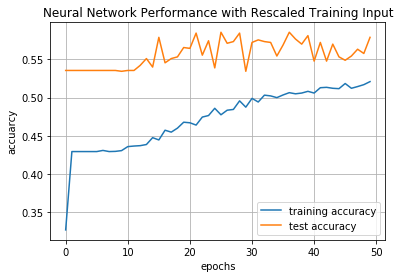

In [34]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])
plt.title('Neural Network Performance with Rescaled Training Input')

In [31]:
model.save("wineNNClean.h5")

In [32]:
from tensorflow.keras.models import load_model

model = load_model("wineNNClean.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               1200      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


In [33]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 79us/sample - loss: 1.0678 - accuracy: 0.5791
accuracy = 0.579065
